In [1]:
import pandas as pd

C:\Users\SHRAVANI\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
df=pd.read_csv("Shark Tank India.csv")

In [7]:
df.head()

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Episode Title,Anchor,Industry,...,Invested Guest Name,All Guest Names,Namita Present,Vineeta Present,Anupam Present,Aman Present,Peyush Present,Ritesh Present,Amit Present,Guest Present
0,1,BluePineFoods,1,1,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Food and Beverage,...,Ashneer Grover,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
1,1,BoozScooters,1,2,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Vehicles/Electrical Vehicles,...,Ashneer Grover,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
2,1,HeartUpMySleeves,1,3,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Beauty/Fashion,...,NaN,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
3,1,TagzFoods,2,4,20-Dec-21,4-Feb-22,21-Dec-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Food and Beverage,...,Ashneer Grover,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
4,1,HeadAndHeart,2,5,20-Dec-21,4-Feb-22,21-Dec-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Children/Education,...,NaN,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              634 non-null    int64  
 1   Startup Name               634 non-null    object 
 2   Episode Number             634 non-null    int64  
 3   Pitch Number               634 non-null    int64  
 4   Season Start               634 non-null    object 
 5   Season End                 478 non-null    object 
 6   Original Air Date          603 non-null    object 
 7   Episode Title              634 non-null    object 
 8   Anchor                     634 non-null    object 
 9   Industry                   634 non-null    object 
 10  Business Description       634 non-null    object 
 11  Company Website            618 non-null    object 
 12  Started in                 456 non-null    float64
 13  Number of Presenters       634 non-null    int64  

In [11]:
df.isna().sum()

Season Number       0
Startup Name        0
Episode Number      0
Pitch Number        0
Season Start        0
                 ... 
Aman Present       78
Peyush Present    246
Ritesh Present    496
Amit Present      497
Guest Present     323
Length: 80, dtype: int64

In [37]:
df["Deal Has Conditions"].unique()

array([nan, 'yes'], dtype=object)

In [39]:
df["Deal Has Conditions"]=df["Deal Has Conditions"].fillna("no")

In [40]:
df[["Yearly Revenue","Monthly Sales", "Gross Margin", "Net Margin"]].corr()

,Yearly Revenue,Monthly Sales,Gross Margin,Net Margin
Yearly Revenue,1.000000,0.928754,-0.136249,-0.153632
Monthly Sales,0.928754,1.000000,-0.178171,-0.064078
Gross Margin,-0.136249,-0.178171,1.000000,0.415473
Net Margin,-0.153632,-0.064078,0.415473,1.000000


In [12]:
df.nunique()

Season Number       4
Startup Name      634
Episode Number     53
Pitch Number      634
Season Start        4
                 ... 
Aman Present        1
Peyush Present      1
Ritesh Present      1
Amit Present        1
Guest Present       2
Length: 80, dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

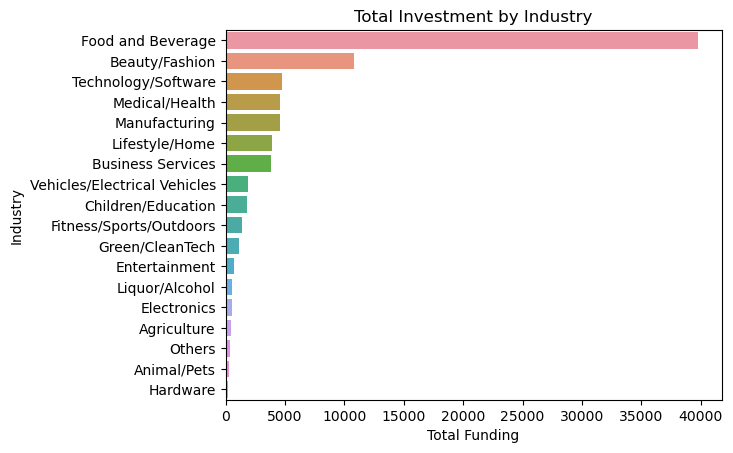

In [17]:
industry_summary = df.groupby('Industry')['Original Ask Amount'].sum().sort_values(ascending=False)

sns.barplot(x=industry_summary.values, y=industry_summary.index)
plt.title("Total Investment by Industry")
plt.xlabel("Total Funding")
plt.ylabel("Industry")
plt.show()

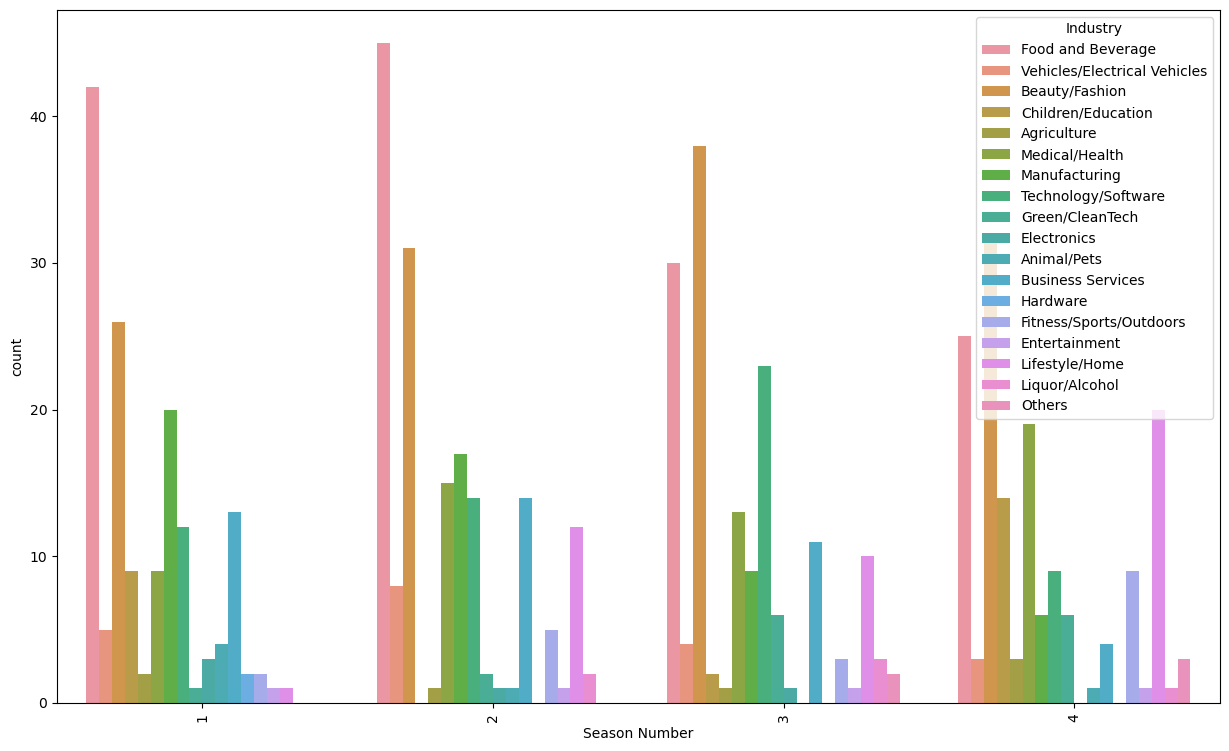

In [41]:
plt.figure(figsize=(15,9))
sns.countplot(x="Season Number",data=df,hue="Industry")
plt.xticks(rotation=90);

C:\Users\SHRAVANI\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


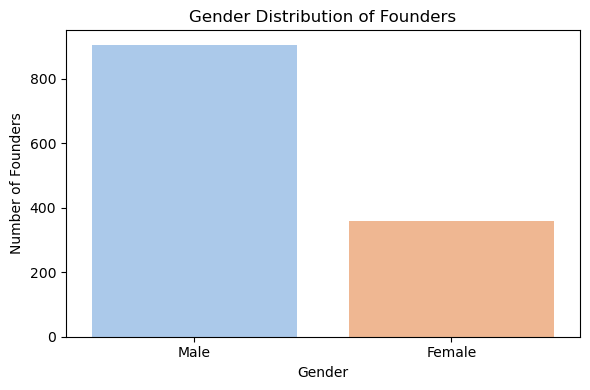

In [20]:
# Replace missing values with 0
df['Male Presenters'] = df['Male Presenters'].fillna(0)
df['Female Presenters'] = df['Female Presenters'].fillna(0)

# Sum total presenters by gender
gender_totals = {
    'Male': df['Male Presenters'].sum(),
    'Female': df['Female Presenters'].sum()
}

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=list(gender_totals.keys()), y=list(gender_totals.values()), palette='pastel')
plt.title("Gender Distribution of Founders")
plt.ylabel("Number of Founders")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()


Here's the gender distribution of founders across Shark Tank India:

A higher number of male presenters than female presenters

Gender diversity is present but not balanced

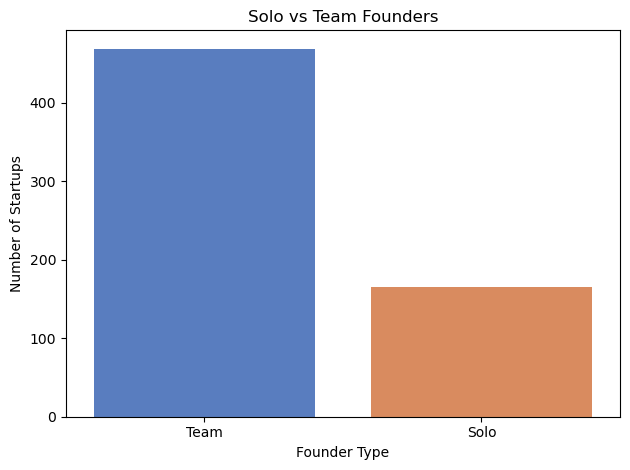

In [21]:
# Classify founder type
def classify_founder_type(n):
    if pd.isna(n):
        return 'Unknown'
    elif n == 1:
        return 'Solo'
    elif n > 1:
        return 'Team'
    else:
        return 'Unknown'

df['Founder Type'] = df['Number of Presenters'].apply(classify_founder_type)

# Count and plot
founder_type_counts = df['Founder Type'].value_counts()

sns.barplot(x=founder_type_counts.index, y=founder_type_counts.values, palette='muted')
plt.title("Solo vs Team Founders")
plt.ylabel("Number of Startups")
plt.xlabel("Founder Type")
plt.tight_layout()
plt.show()

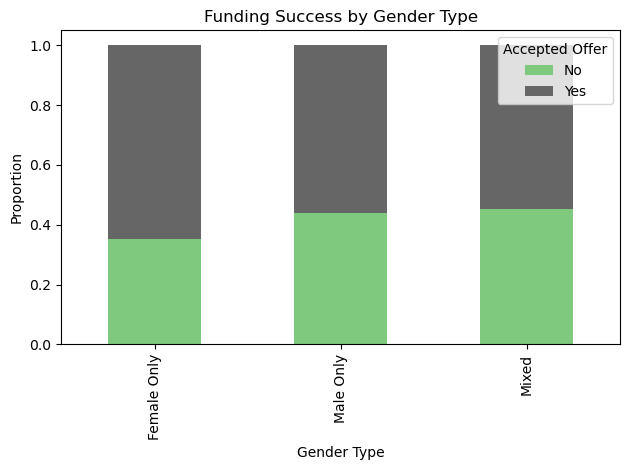

In [22]:

# Fill missing values
df['Male Presenters'] = df['Male Presenters'].fillna(0)
df['Female Presenters'] = df['Female Presenters'].fillna(0)
df['Accepted Offer'] = df['Accepted Offer'].fillna(False)

# Define gender category for each pitch
def assign_gender(row):
    if row['Male Presenters'] > 0 and row['Female Presenters'] > 0:
        return 'Mixed'
    elif row['Male Presenters'] > 0:
        return 'Male Only'
    elif row['Female Presenters'] > 0:
        return 'Female Only'
    else:
        return 'Unknown'

df['Gender Type'] = df.apply(assign_gender, axis=1)

# Create pivot table
gender_success = pd.crosstab(df['Gender Type'], df['Accepted Offer'], normalize='index')

# Plot
gender_success.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Funding Success by Gender Type")
plt.ylabel("Proportion")
plt.xlabel("Gender Type")
plt.legend(title='Accepted Offer', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


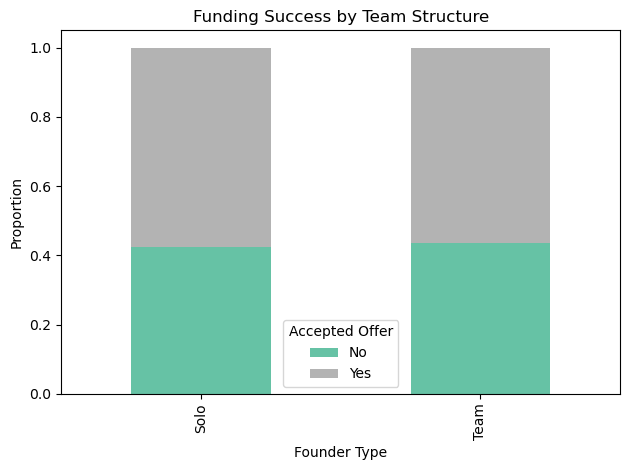

In [23]:
# Classify founder type
def classify_founder_type(n):
    if pd.isna(n):
        return 'Unknown'
    elif n == 1:
        return 'Solo'
    elif n > 1:
        return 'Team'
    else:
        return 'Unknown'

df['Founder Type'] = df['Number of Presenters'].apply(classify_founder_type)

# Create pivot table
team_success = pd.crosstab(df['Founder Type'], df['Accepted Offer'], normalize='index')

# Plot
team_success.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Funding Success by Team Structure")
plt.ylabel("Proportion")
plt.xlabel("Founder Type")
plt.legend(title='Accepted Offer', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


In [24]:
df.describe(include='all')


,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Episode Title,Anchor,Industry,...,Namita Present,Vineeta Present,Anupam Present,Aman Present,Peyush Present,Ritesh Present,Amit Present,Guest Present,Founder Type,Gender Type
count,634.000000,634,634.000000,634.000000,634,478,603,634,634,634,...,495.0,428.0,548.0,556.0,388.0,138.0,137.0,311.000000,634,634
unique,NaN,634,NaN,NaN,4,3,189,190,6,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,BluePineFoods,NaN,NaN,2-Jan-23,10-Mar-23,4-Feb-22,Unseen,Rahul Dua,Food and Beverage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Team,Male Only
freq,NaN,1,NaN,NaN,169,169,7,31,319,142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,469,334
mean,2.500000,NaN,24.055205,317.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.131833,NaN,NaN
std,1.106137,NaN,15.102549,183.164316,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.338854,NaN,NaN
min,1.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,NaN,NaN
25%,2.000000,NaN,11.000000,159.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,NaN,NaN
50%,2.000000,NaN,24.000000,317.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,NaN,NaN
75%,3.000000,NaN,36.000000,475.750000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,NaN,NaN


In [25]:
df['Industry'].value_counts()


Industry
Food and Beverage               142
Beauty/Fashion                  127
Technology/Software              58
Medical/Health                   56
Manufacturing                    52
Lifestyle/Home                   43
Business Services                42
Children/Education               25
Vehicles/Electrical Vehicles     20
Fitness/Sports/Outdoors          19
Green/CleanTech                  15
Agriculture                       7
Animal/Pets                       6
Liquor/Alcohol                    6
Electronics                       5
Others                            5
Entertainment                     4
Hardware                          2
Name: count, dtype: int64

C:\Users\SHRAVANI\AppData\Local\Temp\ipykernel_1264\3346862885.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Original Air Date'] = pd.to_datetime(df['Original Air Date'])


<Axes: xlabel='Original Air Date'>

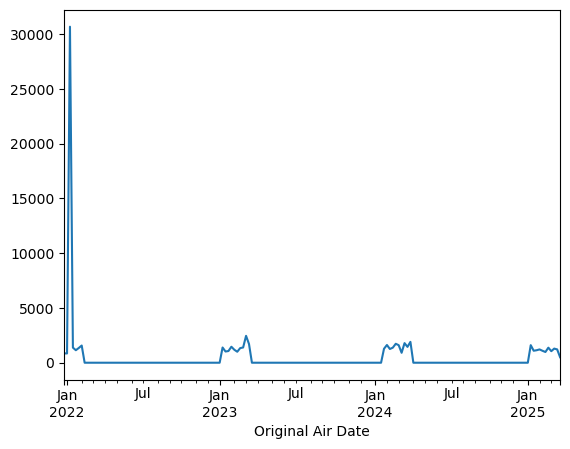

In [28]:
df['Original Air Date'] = pd.to_datetime(df['Original Air Date'])
df.set_index('Original Air Date')['Original Ask Amount'].resample('W').sum().plot()


<Axes: xlabel='Original Offered Equity', ylabel='Original Ask Amount'>

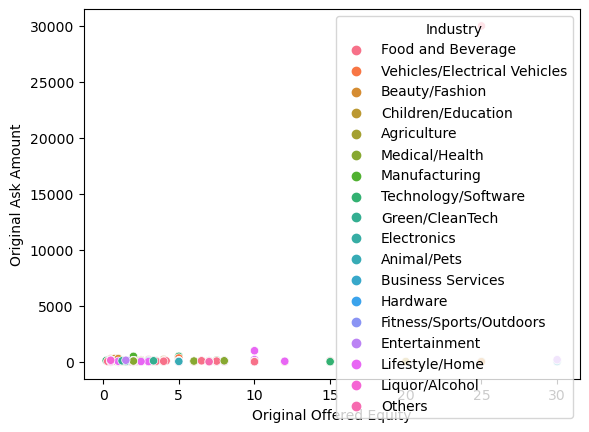

In [29]:
sns.scatterplot(data=df, x='Original Offered Equity', y='Original Ask Amount', hue='Industry')
